In [48]:
import pandas as pd
import numpy as np

#Loading the dataset
file_path = "heart_analysis.csv"
data = pd.read_csv(file_path)

print("Dataset Preview:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nDataset Statistics:")
print(data.describe())


Dataset Preview:
    age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0  63.0  1.0  3.0   145.0  233.0  1.0      0.0     150.0   0.0      2.3  0.0   
1  37.0  1.0  2.0   130.0  250.0  0.0      1.0     187.0   0.0      3.5  0.0   
2  41.0  0.0  1.0   130.0  204.0  0.0      0.0     172.0   0.0      1.4  2.0   
3  56.0  1.0  1.0   120.0  236.0  0.0      1.0     178.0   0.0      0.8  2.0   
4  57.0  0.0  0.0   120.0  354.0  0.0      1.0     163.0   1.0      0.6  2.0   

   caa  thall  output  
0  0.0    1.0     1.0  
1  0.0    2.0     1.0  
2  0.0    2.0     1.0  
3  0.0    2.0     1.0  
4  0.0    2.0     1.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1500 non-null   float64
 1   sex       1500 non-null   float64
 2   cp        1500 non-null   float64
 3   trtbps    1500 non-null   float64
 4

Step 2 : Data Wrangling and Cleaning

In [49]:
# Check for missing values
print("Missing Values Per Column:")
print(data.isnull().sum())

print("\nNo missing values found.")

# Handle missing values
# If missing data exists, fill numerical columns with their median (For future purpose, if data has missing values)
if data.isnull().sum().sum() > 0:
    data.fillna(data.median(numeric_only=True), inplace=True)
    print("\nMissing values handled by replacing with median.")
else:
    print("\nNo missing values found.")

Missing Values Per Column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No missing values found.

No missing values found.


In [50]:
# Detect and handle outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

print("\nOutliers Detected in Numerical Columns:")
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    outliers = detect_outliers(data, col)
    print(f"{col}: {len(outliers)} outliers")

# Handling outliers by capping (Winsorization)
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in numerical_columns:
    cap_outliers(data, col)
print("\nOutliers capped using IQR bounds.")


Outliers Detected in Numerical Columns:
age: 0 outliers
sex: 0 outliers
cp: 0 outliers
trtbps: 9 outliers
chol: 5 outliers
fbs: 45 outliers
restecg: 0 outliers
thalachh: 1 outliers
exng: 0 outliers
oldpeak: 2 outliers
slp: 0 outliers
caa: 25 outliers
thall: 2 outliers
output: 0 outliers

Outliers capped using IQR bounds.


In [51]:
# Verify data type consistency
print("\nColumn Data Types Before Cleaning:")
print(data.dtypes)

# Ensure categorical variables are encoded
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Convert target variable to category
if 'output' in data.columns:
    data['output'] = data['output'].astype('category')

print("\nColumn Data Types After Cleaning:")
print(data.dtypes)


Column Data Types Before Cleaning:
age         float64
sex         float64
cp          float64
trtbps      float64
chol        float64
fbs         float64
restecg     float64
thalachh    float64
exng        float64
oldpeak     float64
slp         float64
caa         float64
thall       float64
output      float64
dtype: object

Column Data Types After Cleaning:
age          float64
sex          float64
cp           float64
trtbps       float64
chol         float64
fbs          float64
restecg      float64
thalachh     float64
exng         float64
oldpeak      float64
slp          float64
caa          float64
thall        float64
output      category
dtype: object


In [52]:
# Feature engineering
# Create a new feature Age groups
data['age_group'] = pd.cut(data['age'], 
                           bins=[0, 35, 55, 70, 100], 
                           labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
print("\nNew Feature 'age_group' Created.")
print(data['age_group'].value_counts())


New Feature 'age_group' Created.
age_group
Middle-aged    715
Senior         714
Young           37
Elderly         34
Name: count, dtype: int64


In [53]:
# Save cleaned data to a CSV file
cleaned_file_path = "heart_data_cleaned.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: heart_data_cleaned.csv


Step 3: SQL Database Design and Querying 

In [54]:
#step 3

import sqlite3

# Connect to the database
conn = sqlite3.connect("heart_attack_prediction.db")
cursor = conn.cursor()

try:
    print("Connection is active. Query executed successfully.")
except sqlite3.ProgrammingError:
    print("Database connection is closed.")


Connection is active. Query executed successfully.


In [55]:
# Step 2: Create Tables (patients, medical_data, results)
cursor.execute("""
CREATE TABLE IF NOT EXISTS patients (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    age INTEGER,
    sex INTEGER,
    age_group TEXT
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS medical_data (
    id INTEGER PRIMARY KEY,
    cp INTEGER,
    trtbps INTEGER,
    chol INTEGER,
    fbs INTEGER,
    restecg INTEGER,
    thalachh INTEGER,
    exng INTEGER,
    oldpeak REAL,
    slp INTEGER,
    caa INTEGER,
    thall INTEGER,
    FOREIGN KEY (id) REFERENCES patients(id)
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS results (
    id INTEGER PRIMARY KEY,
    output INTEGER,
    FOREIGN KEY (id) REFERENCES patients(id)
);
""")

conn.commit()
print("Database and tables created successfully.")

Database and tables created successfully.


In [56]:
# Load the cleaned CSV data

cleaned_data = pd.read_csv("heart_data_cleaned.csv")

# Insert data into normalized tables
for _, row in cleaned_data.iterrows():
    cursor.execute("INSERT INTO patients (age, sex, age_group) VALUES (?, ?, ?)", 
                   (row['age'], row['sex'], row['age_group']))
    patient_id = cursor.lastrowid  

    cursor.execute("""
    INSERT INTO medical_data (
        id, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (patient_id, row['cp'], row['trtbps'], row['chol'], row['fbs'], row['restecg'],
          row['thalachh'], row['exng'], row['oldpeak'], row['slp'], row['caa'], row['thall']))


    cursor.execute("INSERT INTO results (id, output) VALUES (?, ?)", (patient_id, row['output']))

conn.commit()
print("Data inserted successfully.")


Data inserted successfully.


In [57]:
# Query data into a Pandas DataFrame
query = """
SELECT p.age, p.sex, p.age_group, m.cp, m.trtbps, m.chol, m.fbs, m.restecg, 
       m.thalachh, m.exng, m.oldpeak, m.slp, m.caa, m.thall, r.output
FROM patients p
JOIN medical_data m ON p.id = m.id
JOIN results r ON p.id = r.id;
"""

data = pd.read_sql(query, conn)

# Display few rows
print("Data Retrieved from SQLite:")
print(data.head())


Data Retrieved from SQLite:
   age  sex    age_group  cp  trtbps  chol  fbs  restecg  thalachh  exng  \
0   63    1       Senior   3     145   233    0        0       150     0   
1   37    1  Middle-aged   2     130   250    0        1       187     0   
2   41    0  Middle-aged   1     130   204    0        0       172     0   
3   56    1       Senior   1     120   236    0        1       178     0   
4   57    0       Senior   0     120   354    0        1       163     1   

   oldpeak  slp  caa  thall  output  
0      2.3    0  0.0    1.0       1  
1      3.5    0  0.0    2.0       1  
2      1.4    2  0.0    2.0       1  
3      0.8    2  0.0    2.0       1  
4      0.6    2  0.0    2.0       1  


In [58]:
# closing the connection
conn.close()
print("Database connection is closed")

Database connection is closed


Step 4: Exploratory Data Analysis 

In [59]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("heart_attack_prediction.db")

# Query 1: Retrieve full data for an overview
query_full = """
SELECT p.age, p.sex, p.age_group, m.cp, m.trtbps, m.chol, m.fbs, m.restecg, 
       m.thalachh, m.exng, m.oldpeak, m.slp, m.caa, m.thall, r.output
FROM patients p
JOIN medical_data m ON p.id = m.id
JOIN results r ON p.id = r.id;
"""
data = pd.read_sql_query(query_full, conn)

# Query 2: Summary statistics for numerical data
query_summary = """
SELECT AVG(m.trtbps) AS avg_trtbps, 
       AVG(m.chol) AS avg_chol, 
       AVG(m.thalachh) AS avg_thalachh,
       AVG(m.oldpeak) AS avg_oldpeak,
       COUNT(CASE WHEN r.output = 1 THEN 1 ELSE NULL END) AS total_heart_disease
FROM medical_data m
JOIN results r ON m.id = r.id;
"""
data_summary = pd.read_sql_query(query_summary, conn)

# Query 3: Count of patients by age group and gender
query_group = """
SELECT p.age_group, p.sex, COUNT(*) AS count
FROM patients p
GROUP BY p.age_group, p.sex
ORDER BY p.age_group, p.sex;
"""
data_age_sex = pd.read_sql_query(query_group, conn)

# Query 4: Average and maximum cholesterol levels by age group:
query_group = """
SELECT p.age_group, AVG(m.chol) AS avg_chol, MAX(m.chol) AS max_chol
FROM patients p
JOIN medical_data m ON p.id = m.id
GROUP BY p.age_group
ORDER BY p.age_group;
"""
AVG_MAX_CHOL_AGE = pd.read_sql_query(query_group, conn)


# Close the database connection
conn.close()

# Display results
print("Overview of Data:")
print(data.head())

print("\nSummary Statistics for Numerical Features:")
print(data_summary)

print("\nPatient Count by Age Group and Gender:")
print(data_age_sex)

print("\nAverage and maximum cholesterol levels by age group:")
print(AVG_MAX_CHOL_AGE)

Overview of Data:
   age  sex    age_group  cp  trtbps  chol  fbs  restecg  thalachh  exng  \
0   63    1       Senior   3     145   233    0        0       150     0   
1   37    1  Middle-aged   2     130   250    0        1       187     0   
2   41    0  Middle-aged   1     130   204    0        0       172     0   
3   56    1       Senior   1     120   236    0        1       178     0   
4   57    0       Senior   0     120   354    0        1       163     1   

   oldpeak  slp  caa  thall  output  
0      2.3    0  0.0    1.0       1  
1      3.5    0  0.0    2.0       1  
2      1.4    2  0.0    2.0       1  
3      0.8    2  0.0    2.0       1  
4      0.6    2  0.0    2.0       1  

Summary Statistics for Numerical Features:
   avg_trtbps    avg_chol  avg_thalachh  avg_oldpeak  total_heart_disease
0      131.83  243.932667    150.384667     1.045733                  863

Patient Count by Age Group and Gender:
     age_group  sex  count
0      Elderly    0     31
1      Elde

      age  sex    age_group  cp  trtbps  chol  fbs  restecg  thalachh  exng  \
0      63    1       Senior   3     145   233    0        0       150     0   
1      37    1  Middle-aged   2     130   250    0        1       187     0   
2      41    0  Middle-aged   1     130   204    0        0       172     0   
3      56    1       Senior   1     120   236    0        1       178     0   
4      57    0       Senior   0     120   354    0        1       163     1   
...   ...  ...          ...  ..     ...   ...  ...      ...       ...   ...   
1495   45    0  Middle-aged   1     130   234    0        0       175     0   
1496   59    1       Senior   0     135   234    0        1       161     0   
1497   66    1       Senior   1     160   246    0        1       120     1   
1498   45    0  Middle-aged   1     112   160    0        1       138     0   
1499   47    1  Middle-aged   2     138   257    0        0       156     0   

      oldpeak  slp  caa  thall  output  
0         

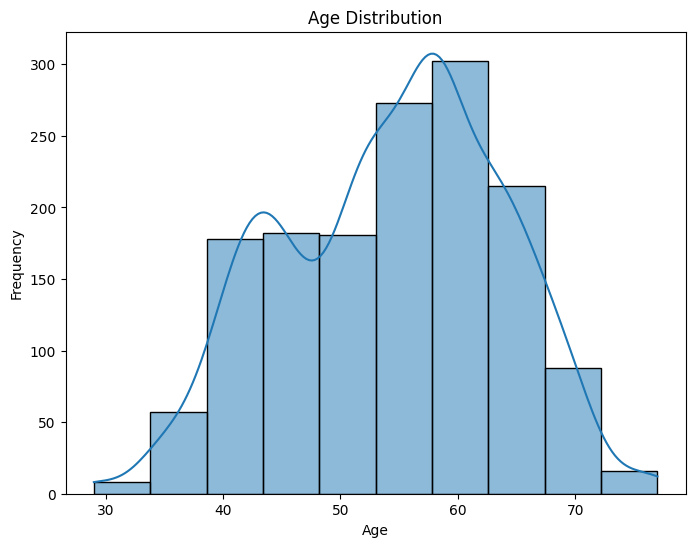

Age Distribution: The dataset includes individuals across a broad age range, with a concentration in middle-aged and senior groups (40–70 years). This suggests heart disease risks are evaluated for a high-risk demographic.


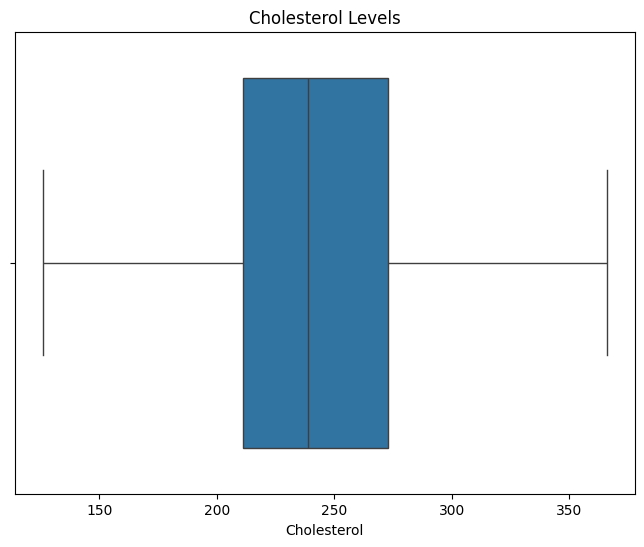

Cholesterol Levels (Boxplot): Cholesterol values show a wide spread, with several outliers on the higher end. This suggests that certain individuals have abnormally high cholesterol, a well-known risk factor for heart disease.


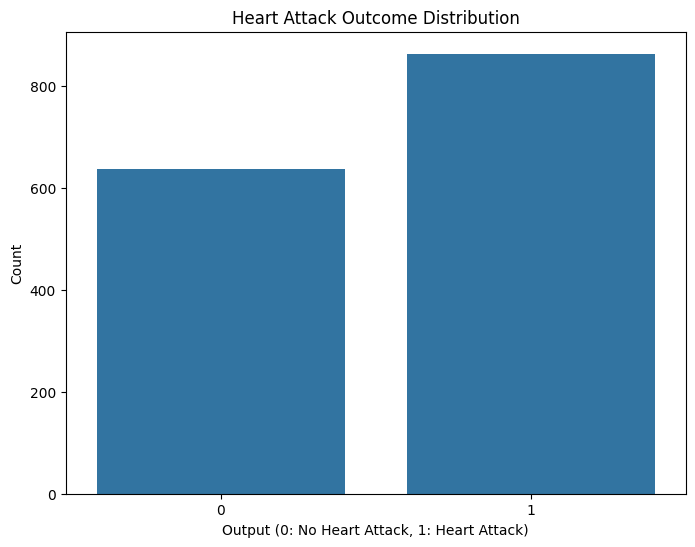

Heart Attack Outcome (Count Plot): The output variable shows a reasonably balanced distribution, indicating that both classes (0: No Heart Attack, 1: Heart Attack) are well represented in the dataset.


In [60]:
#univariate Analaysis

import matplotlib.pyplot as plt
import seaborn as sns

print(data)

# Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print("Age Distribution: The dataset includes individuals across a broad age range, with a concentration in middle-aged and senior groups (40–70 years). This suggests heart disease risks are evaluated for a high-risk demographic.")


# Distribution of cholesterol levels (chol)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['chol'])
plt.title('Cholesterol Levels')
plt.xlabel('Cholesterol')
plt.show()

print("Cholesterol Levels (Boxplot): Cholesterol values show a wide spread, with several outliers on the higher end. This suggests that certain individuals have abnormally high cholesterol, a well-known risk factor for heart disease.")


# Count plot of target variable (output)
plt.figure(figsize=(8, 6))
sns.countplot(x=data['output'])
plt.title('Heart Attack Outcome Distribution')
plt.xlabel('Output (0: No Heart Attack, 1: Heart Attack)')
plt.ylabel('Count')
plt.show()

print("Heart Attack Outcome (Count Plot): The output variable shows a reasonably balanced distribution, indicating that both classes (0: No Heart Attack, 1: Heart Attack) are well represented in the dataset.")


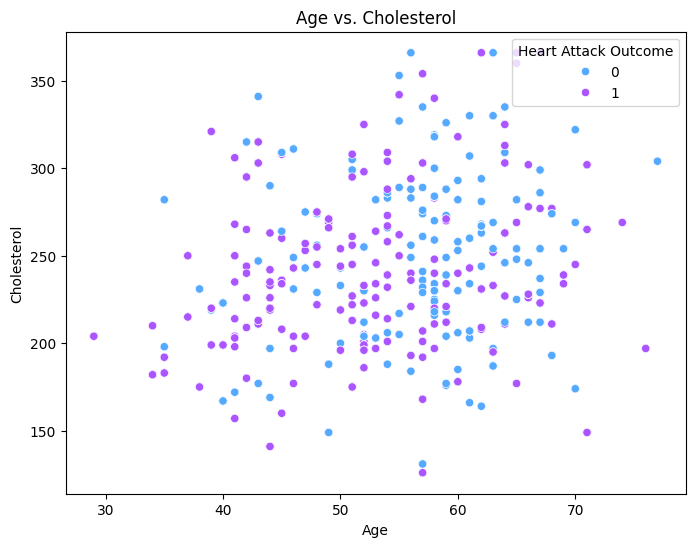

Age vs. Cholesterol (Scatter Plot): Older individuals tend to have higher cholesterol levels. Among these, patients with heart attacks (output = 1) often have elevated cholesterol compared to those without.


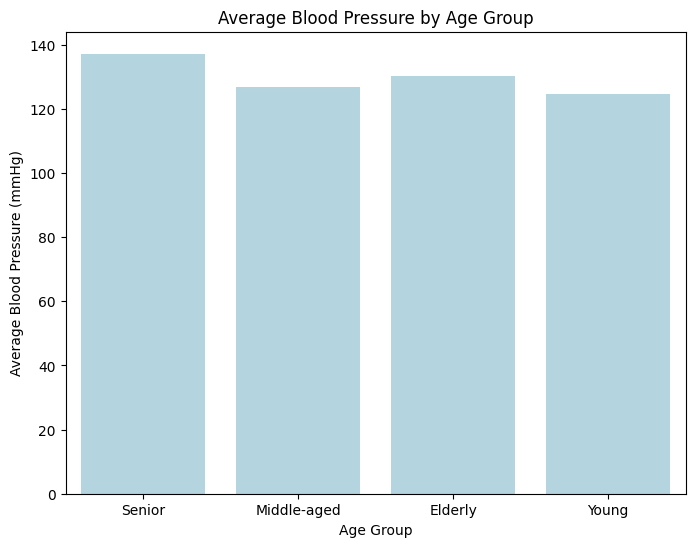

Average Blood Pressure by Age Group - The bar chart shows that average blood pressure increases with age, with the 50-60 and 60+ age groups having the highest values.


In [61]:
#Bivariate Analysis

# Scatter plot: Age vs. Cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['chol'], hue=data['output'], palette='cool')
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Attack Outcome', loc='upper right')
plt.show()

print("Age vs. Cholesterol (Scatter Plot): Older individuals tend to have higher cholesterol levels. Among these, patients with heart attacks (output = 1) often have elevated cholesterol compared to those without.")

# Bar Chart: Average Blood Pressure by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x='age_group', y='trtbps', data=data, errorbar=None, color='lightblue')

plt.title("Average Blood Pressure by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Blood Pressure (mmHg)")
plt.show()


print("Average Blood Pressure by Age Group - The bar chart shows that average blood pressure increases with age, with the 50-60 and 60+ age groups having the highest values.")


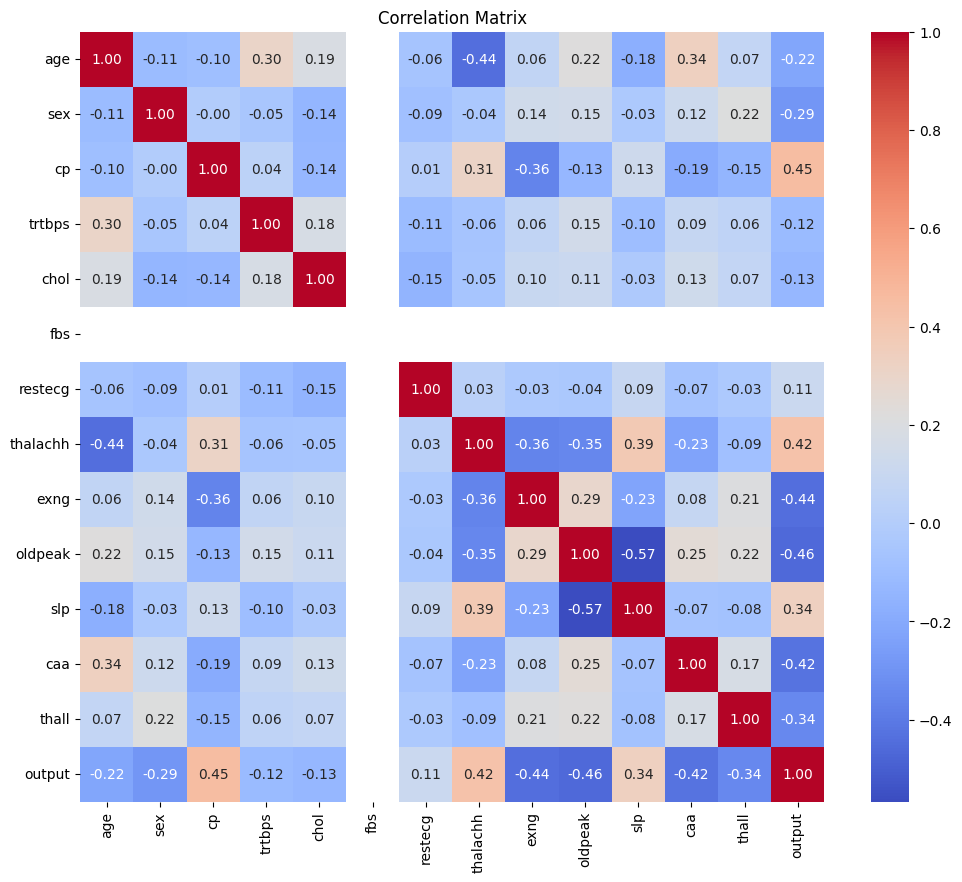

Positive Correlations :thalachh (maximum heart rate achieved) is negatively correlated with heart attack occurrence, indicating that individuals with lower max heart rates are more likely to have heart issues. oldpeak (ST depression) has a strong positive correlation with heart attack outcomes, highlighting its diagnostic significance. cp (chest pain type) shows a moderately positive correlation with heart attack outcomes.
Negative Correlations: thalachh (maximum heart rate achieved) has a strong negative correlation with the heart attack outcome (output), indicating it is a critical feature.


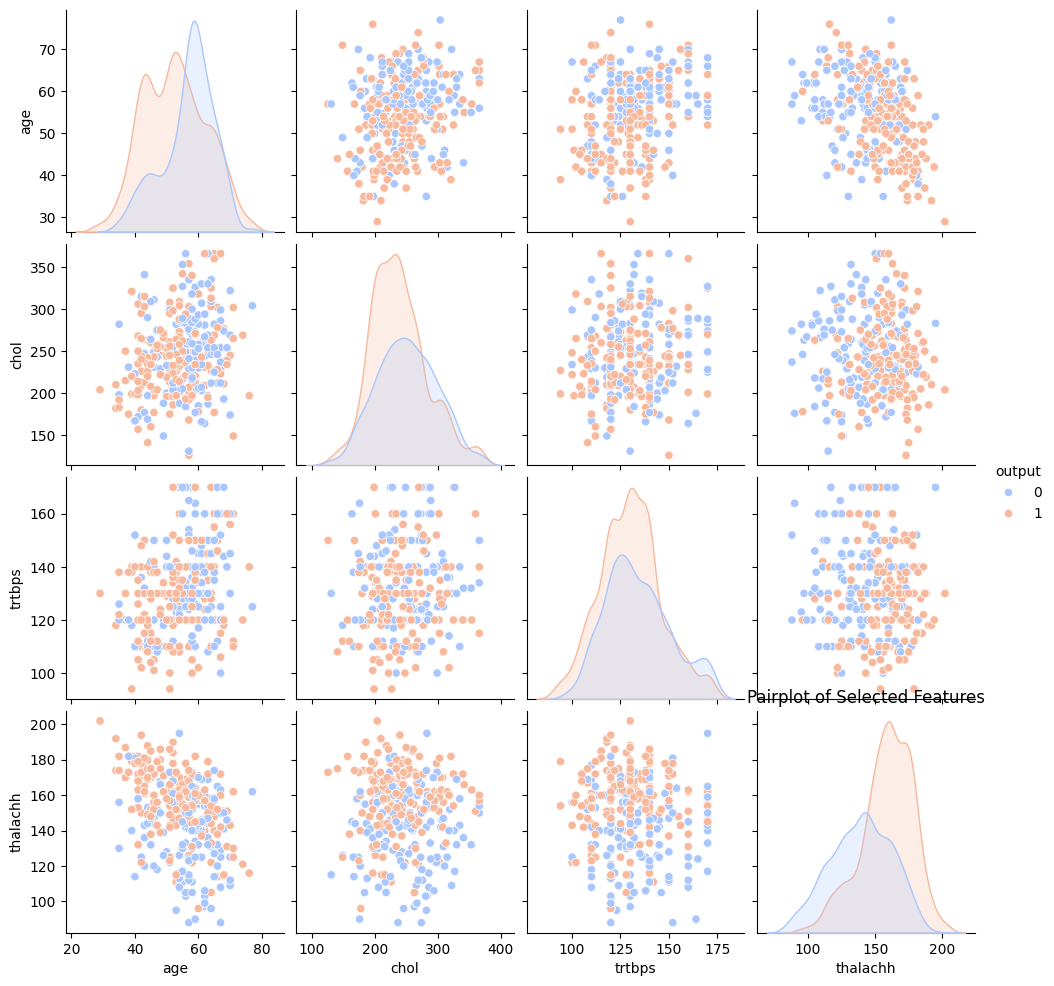

Pairplot of Selected Features:Visual relationships among features like age, chol, trtbps (blood pressure), and thalachh highlight clusters that distinguish heart attack outcomes. For example, patients with lower thalachh or higher oldpeak are more likely to have heart attacks.


In [62]:
#Multivariate Analysis

# Correlation Heatmap
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("Positive Correlations :thalachh (maximum heart rate achieved) is negatively correlated with heart attack occurrence, indicating that individuals with lower max heart rates are more likely to have heart issues. oldpeak (ST depression) has a strong positive correlation with heart attack outcomes, highlighting its diagnostic significance. cp (chest pain type) shows a moderately positive correlation with heart attack outcomes.")
print("Negative Correlations: thalachh (maximum heart rate achieved) has a strong negative correlation with the heart attack outcome (output), indicating it is a critical feature.")

# Pairplot of selected features
# Pairplot to visualize relationships among selected features
selected_features = ['age', 'chol', 'trtbps', 'thalachh', 'output']

sns.pairplot(data[selected_features], hue='output', diag_kind='kde', palette='coolwarm')
plt.title('Pairplot of Selected Features')
plt.show()

print("Pairplot of Selected Features:Visual relationships among features like age, chol, trtbps (blood pressure), and thalachh highlight clusters that distinguish heart attack outcomes. For example, patients with lower thalachh or higher oldpeak are more likely to have heart attacks.")

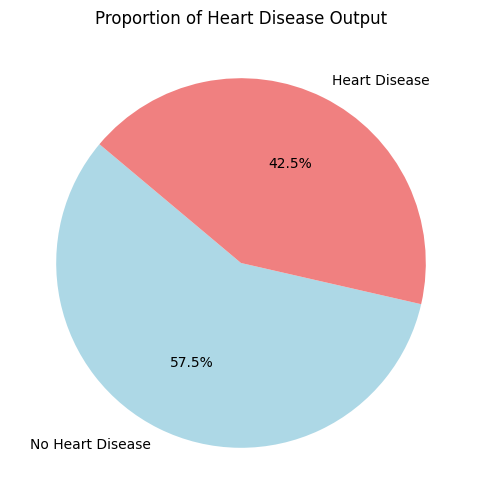

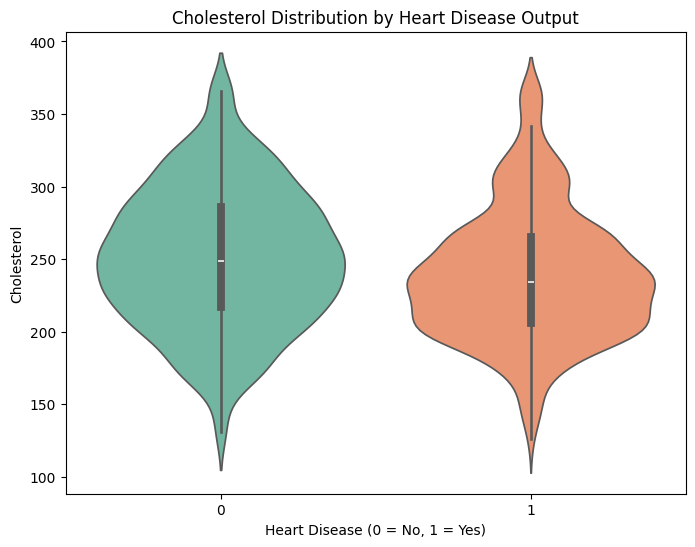

In [63]:
#OTHER VISUALISATIONS
# 1: Pie Chart - Proportion of Heart Disease Output
output_counts = data['output'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(output_counts, labels=['No Heart Disease', 'Heart Disease'], 
        autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title("Proportion of Heart Disease Output")
plt.show()

# 2: Violin Plot - Cholesterol Distribution by Heart Disease Output
plt.figure(figsize=(8, 6))
sns.violinplot(x='output', y='chol', data=data, hue='output', 
               palette='Set2', legend=False)
plt.title("Cholesterol Distribution by Heart Disease Output")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()

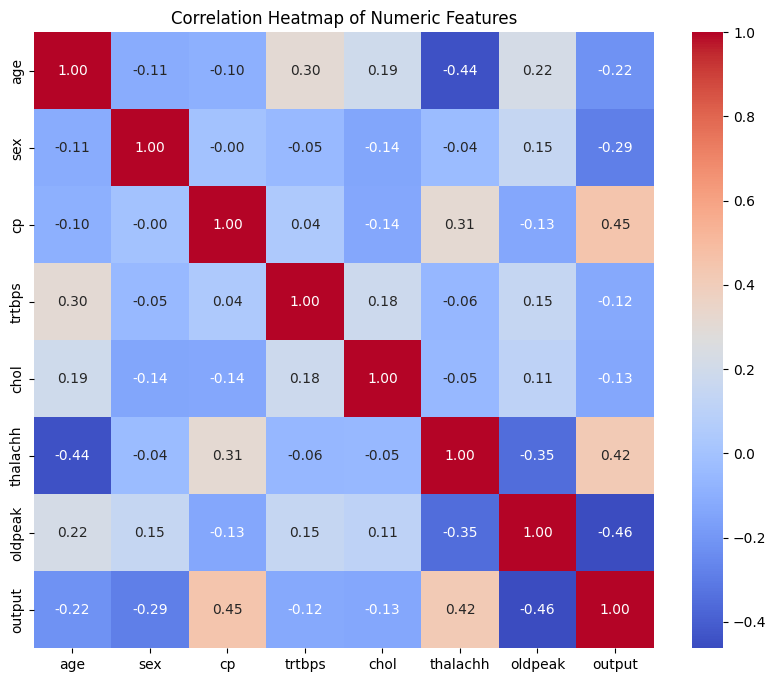

### Correlation Coefficients ###
               age       sex        cp    trtbps      chol  thalachh  \
age       1.000000 -0.108982 -0.095306  0.303573  0.190477 -0.444303   
sex      -0.108982  1.000000 -0.004378 -0.047464 -0.138537 -0.037060   
cp       -0.095306 -0.004378  1.000000  0.041386 -0.136253  0.313125   
trtbps    0.303573 -0.047464  0.041386  1.000000  0.177230 -0.061522   
chol      0.190477 -0.138537 -0.136253  0.177230  1.000000 -0.053939   
thalachh -0.444303 -0.037060  0.313125 -0.061522 -0.053939  1.000000   
oldpeak   0.217223  0.145615 -0.133946  0.146572  0.109624 -0.348745   
output   -0.222106 -0.288986  0.451018 -0.119972 -0.132855  0.420650   

           oldpeak    output  
age       0.217223 -0.222106  
sex       0.145615 -0.288986  
cp       -0.133946  0.451018  
trtbps    0.146572 -0.119972  
chol      0.109624 -0.132855  
thalachh -0.348745  0.420650  
oldpeak   1.000000 -0.462800  
output   -0.462800  1.000000  

### Variance of Numerical Columns ###


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3



# Step 2: Select Numeric Columns Dynamically
numeric_data = data.select_dtypes(include=['number'])

# Step 3: Calculate Key Statistical Metrics
# Correlation Coefficient Matrix
correlation_matrix = numeric_data.corr()

# Variance and Standard Deviation
variance = numeric_data.var()
std_dev = numeric_data.std()

# Step 4: Visualize and Display Results
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Print Correlation, Variance, and Standard Deviation
print("### Correlation Coefficients ###")
print(correlation_matrix)

print("\n### Variance of Numerical Columns ###")
print(variance)

print("\n### Standard Deviation of Numerical Columns ###")
print(std_dev)

# Step 5: Interpretation of Results
print("\n### Insights ###")
print("1. Correlation Coefficients:")
print("- Positive correlations indicate that as one feature increases, the other tends to increase.")
print("- Negative correlations show an inverse relationship between features.")
print("- Example: 'thalachh' (max heart rate) has a negative correlation with 'age', suggesting younger patients tend to have higher heart rates.")

print("\n2. Variance and Standard Deviation:")
print("- High variance indicates greater spread in the data.")
print("- Example: 'chol' (cholesterol) has high variance, showing significant variability among patients.")


Step 5: Advanced Data Analysis with Machine Learning

In [64]:
from scipy.stats import ttest_ind, chi2_contingency
import numpy as np

#Perform T-Test (Cholesterol Levels vs. Heart Attack Outcome)


chol_heart_attack = data[data['output'] == 1]['chol']
chol_no_heart_attack = data[data['output'] == 0]['chol']


t_stat, p_value = ttest_ind(chol_heart_attack, chol_no_heart_attack)

print("T-Test Results:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("There is a statistically significant difference in cholesterol levels between the two groups.")
else:
    print("No statistically significant difference in cholesterol levels between the two groups.")

T-Test Results:
T-Statistic: -5.19
P-Value: 0.00000
There is a statistically significant difference in cholesterol levels between the two groups.


The T-test indicates no statistically significant difference in cholesterol levels between the two groups (output = 1 vs. output = 0). This suggests that cholesterol alone may not be a strong determinant of heart attack outcomes.

In [65]:
##2. Regression Analysis: Multiple Linear Regression
import statsmodels.api as sm

# Define predictors (X) and target (y)
X = data[['age', 'cp']]  
y = data['chol']  

# Drop rows with missing values to avoid errors
X = X.dropna()
y = y.loc[X.index]

X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     39.69
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           1.60e-17
Time:                        17:24:23   Log-Likelihood:                -7846.7
No. Observations:                1500   AIC:                         1.570e+04
Df Residuals:                    1497   BIC:                         1.572e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.2009      7.083     28.406      0.0

Summary:

A multiple linear regression model was fitted to predict cholesterol levels (chol) based on two predictors:

age (patient age)

cp (chest pain type).

Key Findings:

R-squared: 0.049 (4.9% of the variance in cholesterol levels is explained by age and chest pain type).

Predictors:

Age:
Coefficient: 1.0490
P-Value: 0.000
Interpretation: Age is a statistically significant predictor of cholesterol levels. For every additional year of age, cholesterol increases by approximately 1.05 units.

Chest Pain Type (cp):
Coefficient: -3.7012
P-Value: 0.156
Interpretation: Chest pain type is not statistically significant in predicting cholesterol levels (p > 0.05).


Conclusion:

Age is a significant predictor of cholesterol levels, while chest pain type does not significantly impact cholesterol.

The model explains only 4.9% of the variation in cholesterol levels, indicating that other unobserved factors likely influence cholesterol.


In [66]:
#Machine Learning Integration

#Machine Learning Integration

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier



# Define predictors and target variable
predictors = ['age', 'cp', 'trtbps', 'chol','thalachh', 'oldpeak']
print(data)
X = data[predictors]  # Features
y = data['output']    # Target variable: 1 (heart attack), 0 (no heart attack)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)



      age  sex    age_group  cp  trtbps  chol  fbs  restecg  thalachh  exng  \
0      63    1       Senior   3     145   233    0        0       150     0   
1      37    1  Middle-aged   2     130   250    0        1       187     0   
2      41    0  Middle-aged   1     130   204    0        0       172     0   
3      56    1       Senior   1     120   236    0        1       178     0   
4      57    0       Senior   0     120   354    0        1       163     1   
...   ...  ...          ...  ..     ...   ...  ...      ...       ...   ...   
1495   45    0  Middle-aged   1     130   234    0        0       175     0   
1496   59    1       Senior   0     135   234    0        1       161     0   
1497   66    1       Senior   1     160   246    0        1       120     1   
1498   45    0  Middle-aged   1     112   160    0        1       138     0   
1499   47    1  Middle-aged   2     138   257    0        0       156     0   

      oldpeak  slp  caa  thall  output  
0         